In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# 載入資料集

In [2]:
x, y = load_iris(return_X_y=True)
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [3]:
train_x, test_x, train_y, test_y = train_test_split(x, y)
print(train_x.shape)
print(train_y.shape)

(112, 4)
(112,)


# 顯示資料分佈

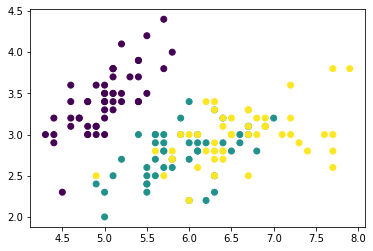

In [4]:
plt.scatter(x[:, 0], x[:, 1], c=y) # 特徵共有4維 僅用前2維作圖

# 主要算法實現

In [5]:
class GaussianNaiveBayes:
    """https://www.youtube.com/watch?v=H3EjCKtlVog"""
    def fit(self, x, y):
        targets = np.unique(y)
        # 計算每個類別的先驗機率
        self._priors = np.array([y[y == target].size / y.size 
                                 for target in targets])
        # 計算每個類別的高斯分布
        self._gaussians = [self._make_gaussian(x[y == target]) 
                           for target in targets]

    def predict(self, x):
        # x.shape = (樣本數, 特徵數)
        # 根據每個樣本的每個特徵 算出各類別的機率 最後找出機率最大的類別
        return np.apply_along_axis(self._proba, axis=1, arr=x).argmax(axis=1)
    
    def _make_gaussian(self, x):
        """以平均值與變異數生成高斯分布函數"""
        mean = x.mean(axis=0)
        var = x.var(axis=0)
        def gaussian(x):
            """輸入單一樣本從高斯分布取值"""
            numerator = np.exp(-(x - mean)**2 / (2 * var))
            denominator = (2 * np.pi * var)**0.5
            return numerator / denominator１
        return gaussian
    
    def _proba(self, x):
        """輸入單一樣本計算各類別的機率"""
        posteriors = [gaussian(x).sum() for gaussian in self._gaussians]
        return self._priors + posteriors

In [6]:
gnb = GaussianNaiveBayes()
gnb.fit(train_x, train_y)

# 驗證算法準確率

In [7]:
predictions = gnb.predict(test_x)
print("Accuracy:", (predictions == test_y).mean())

Accuracy: 0.8947368421052632


# 可視化驗證

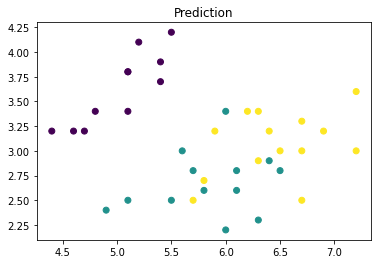

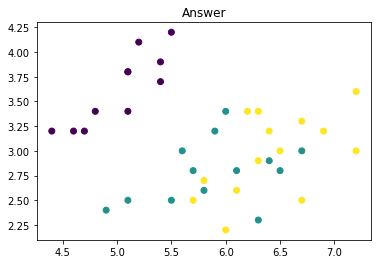

In [8]:
plt.title("Prediction")
plt.scatter(test_x[:, 0], test_x[:, 1], c=predictions)
plt.show()

plt.title("Answer")
plt.scatter(test_x[:, 0], test_x[:, 1], c=test_y)
plt.show()